In [1]:
ls

all-average-lmc.fits  error_with_jitter.py  rv_from_param.py
all-average-smc.fits  jitter.py             second_reduce.py
binary_detection.py   lnlikelihood.py       synthetic_galaxy.py
binary_fraction.py    machine_error.py      table_convert.py
binary_params.py      plot_rv.py            Untitled.ipynb
chi_sq_mean.py        __pycache__/


In [2]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py

In [3]:
from astropy.io import fits
from astropy.table import Table

In [4]:
lmc = fits.getdata('all-average-lmc.fits')
lmc = table_convert(lmc)
lmc = second_reduce(Table(lmc))
lmc['RADIALV'].unit = u.km/u.s
lmc['RADIAL_ERR'].unit = u.km/u.s

In [5]:
lmc['RADIALV']

[231.17038 230.89876 230.99196 230.83307 230.79813 231.04836 229.54332 230.8165 230.80255]
[250.19618 249.96191 249.9088 249.72995 249.93881 249.45212 249.26218 250.89487 249.91853]
[237.23451 237.1751 237.20723 236.99663 236.96706 237.01067 237.1595 236.9611 ]
[206.82503 206.81335 206.79012 206.85545 206.95317 206.84123 207.04236 208.2946 207.70848]
[222.02307 222.17189 220.76285 220.97256 220.88548 221.45279 221.27332 220.40077 221.05911]
[232.78552 232.82983 233.09476 232.99303 233.16414 233.0298 233.25323 233.03505 233.0866 ]
[259.1222 259.09393 259.05307 259.22418 259.37283 259.09906 258.93588 258.9442 258.63098]
[262.78806 262.76926 262.62964 263.08252 263.02103 261.8282 261.81732 262.1807 261.58875]
[208.59985 208.19894 208.44461 208.68025 208.87785 208.5409 208.45683 208.54227 208.55113]
[293.63474 293.35977 292.22745 292.25385 292.4965 290.77322 290.70956 291.9019 291.55786]
[253.01013 253.01503 252.46971 252.75388 252.91212 252.59041 252.02498 252.25418]


In [6]:
lmc_err_j = error_with_jitter(lmc['RADIAL_ERR'], 0.3, 0.61, lmc['LOGG'])

lmc_detection_rate = binary_fraction(lmc['RADIALV'],
                                     lmc["RADIAL_ERR"])
lmc_detection_rate_j = binary_fraction(lmc['RADIALV'], lmc_err_j)

In [53]:
lmc_detection_rate, lmc_detection_rate_j

(0.9263959390862944, 0.10406091370558376)

In [8]:
rv_syn, err_syn = synthetic_galaxy(lmc, 0.5, 100*u.jupiterMass, 3, 2)

In [10]:
err_syn_j = error_with_jitter(err_syn, 0.3, 0.6, lmc['LOGG'])

In [11]:
rv_syn

[<Quantity [230.7885, 230.7885, 230.7885, 230.7885, 230.7885, 230.7885,
            230.7885, 230.7885, 230.7885] km / s>,
 <Quantity [249.96799, 249.96799, 249.96799, 249.96799, 249.96799,
            249.96799, 249.96799, 249.96799, 249.96799] km / s>,
 <Quantity [237.09702, 237.09702, 237.09702, 237.09702, 237.09702,
            237.09702, 237.09702, 237.09702] km / s>,
 <Quantity [210.20831877, 210.37648918, 211.59724542, 211.85265328,
            212.05081431, 213.53985945, 213.66789   , 214.40043298,
            214.70188027] km / s>,
 <Quantity [222.3794426 , 222.37996573, 222.3838987 , 222.38475693,
            222.38543273, 222.39085741, 222.3913593 , 222.39437851,
            222.39570879] km / s>,
 <Quantity [233.0275, 233.0275, 233.0275, 233.0275, 233.0275, 233.0275,
            233.0275, 233.0275, 233.0275] km / s>,
 <Quantity [264.14723488, 264.15722909, 264.08707268, 264.02906445,
            263.97058885, 263.06560259, 262.94575849, 262.1443637 ,
            261.7683559

In [12]:
# Add machine error to synthetic observations
rv_syn_j = machine_error(rv_syn, err_syn_j)

In [13]:
syn_fraction_j = binary_fraction(rv_syn_j, err_syn_j)

In [52]:
syn_fraction_j

0.15355329949238578

In [15]:
%run lnlikelihood.py

In [29]:
syn_list = lnlikelihood(None, 200, lmc,
                        0.5, 100*u.jupiterMass, 
                       3, 2, 0.3, 0.1)

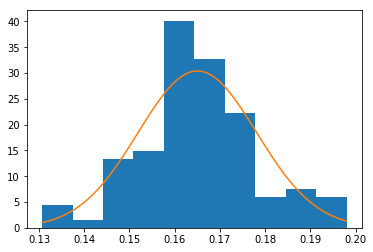

In [51]:
import matplotlib.pyplot as plt   
import scipy
plt.hist(syn_list, density = True)
x = np.linspace(min(syn_list), max(syn_list), 100)
plt.plot(x, scipy.stats.norm.pdf(x, np.mean(syn_list), np.std(syn_list)))

In [50]:
np.mean(syn_list)

0.16501269035532995

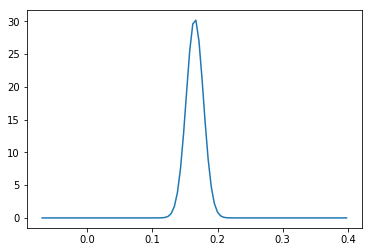

In [45]:
plt.plot(x,y)

Type help() for interactive help, or help(object) for help about object.